In [2]:
print("Data Science and AI")

Data Science and AI


**Project Introduction**

This project focuses on **clustering biological specimens** based on their **morphological features** such as sepal and petal dimensions. Using the classic **Iris dataset**, the goal is to apply **unsupervised learning** techniques to automatically identify natural groupings among flower samples without relying on predefined species labels.

Through this analysis, we aim to explore intrinsic patterns in biological data, visualize feature relationships, and assess how well the clusters align with actual species classifications. The project demonstrates how **machine learning** can support biological research by reducing manual classification efforts and enhancing data-driven taxonomy.


In [3]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

*The essential Python libraries are imported here:*

1. pandas for structured data handling

2. matplotlib and seaborn for visualization

3. StandardScaler from sklearn for feature scaling

*These libraries form the core toolkit for exploratory data analysis and preprocessing.*

In [4]:
iris = load_iris()


*The Iris dataset is loaded from sklearn.datasets.*
It’s a classic dataset consisting of 150 flower samples across three species: setosa, versicolor, and virginica.
Each sample includes four numerical features — sepal length, sepal width, petal length, and petal width.
This dataset completely matches with our problem statement which is "Clustering Biological Specimens by Morphological Features"

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
print(df.head(10))
print(df.tail(10))

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
5                5.4               3.9                1.7               0.4
6                4.6               3.4                1.4               0.3
7                5.0               3.4                1.5               0.2
8                4.4               2.9                1.4               0.2
9                4.9               3.1                1.5               0.1
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
140                6.7               3.1                5.6               2.4
141     

The dataset is converted to a pandas DataFrame for readability and analysis.
This allows us to inspect data in tabular form, view head/tail samples, and perform transformations easily.

In [6]:
df['species'] = iris.target
species_map = {0: 'setosa', 1: 'versicolor', 2: 'virginica'}
df['species_name'] = df['species'].map(species_map)
print(df.head(3))
print(df.iloc[50:54])
print(df.tail(3))
print(df.loc[df['species_name'] == 'setosa'])

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
50                7.0               3.2                4.7               1.4   
51                6.4               3.2                4.5               1.5   
52                6.9               3.1                4.9               1.5   
53                5.5               2.3                4.0               1.3   

    species species_name  
50        1   versicolor  
51        1   versicolor  
52        1   versicolor  
53        1   versicolor  
     sepal length (cm)  sepal width (cm)  p

The numeric species column is remapped to descriptive labels (setosa, versicolor, virginica).

1. This improves interpretability during visualization.

2. The numeric column is still retained for modeling.

This step ensures clarity while maintaining compatability with machine learning algorithms.

In [7]:
print("\n *--- Dataset Info ---*")
df.info()

print("\n *--- Shape and Types ---*")
print(df.shape)
print(df.dtypes)

print("\n *--- Statistical Summary ---* ")
print(df.describe())

print("\n *--- Missing Values ---*")
print(df.isnull().sum())

print("\n *--- Duplicate Rows ---*")
print(df.duplicated().sum())

print("\n *--- unique values per column ---*")
print(df.nunique())




 *--- Dataset Info ---*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species            150 non-null    int64  
 5   species_name       150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB

 *--- Shape and Types ---*
(150, 6)
sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
species                int64
species_name          object
dtype: object

 *--- Statistical Summary ---* 
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.0

Basic exploratory checks are performed:

1. .info() to view data types and memory usage

2. .describe() for statistical summaries

3. Checks for missing values, duplicates, and unique counts

4. The Iris dataset is clean, balanced, and has no null or duplicate entries — meaning no imputation or feature engineering is required.

*Why no feature engineering?*
Because the dataset is small, standardized, and well-structured. Adding artificial features wouldn’t add value and could overfit models.

*Why no PCA?*
PCA is typically used to reduce high-dimensional data. Here, we have only four features, so dimensionality reduction would only obscure interpretability without performance gain.

In [8]:
print("\n--- Sample Records ---")
df = df.drop(columns = ['species'])
print(df.head())




--- Sample Records ---
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species_name  
0       setosa  
1       setosa  
2       setosa  
3       setosa  
4       setosa  


In [9]:
species_map = {'setosa': 0, 'versicolor': 1, 'virginica': 2}
df['species'] = df['species_name'].map(species_map)

print(df.head())


   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species_name  species  
0       setosa        0  
1       setosa        0  
2       setosa        0  
3       setosa        0  
4       setosa        0  


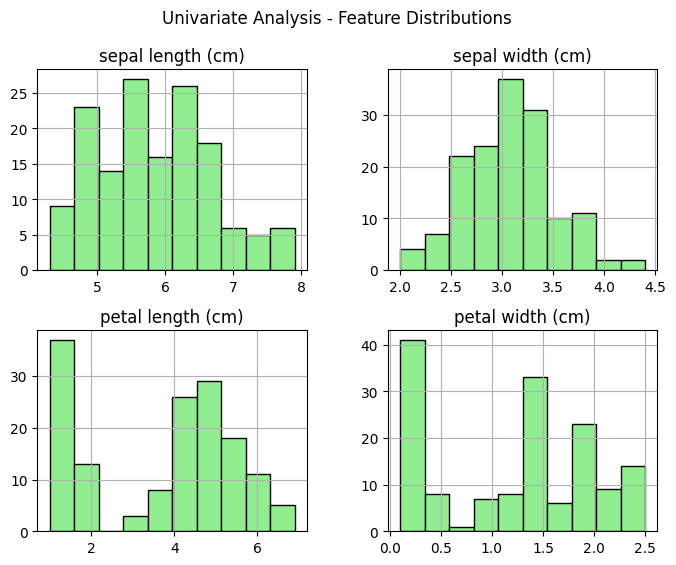

/tmp/ipython-input-1567622407.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal length (cm)'], shade=True, color='teal')


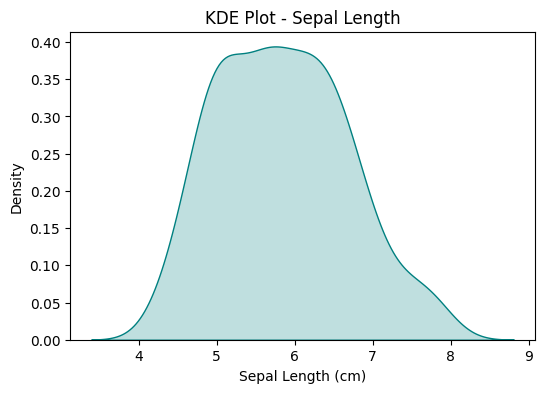

In [10]:
features = ['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)', 'petal width (cm)']

df[features].hist(figsize=(8,6), color='lightgreen', edgecolor='black')
plt.suptitle("Univariate Analysis - Feature Distributions", fontsize=12)
plt.show()

plt.figure(figsize=(6,4))
sns.kdeplot(df['sepal length (cm)'], shade=True, color='teal')
plt.title("KDE Plot - Sepal Length")
plt.xlabel("Sepal Length (cm)")
plt.show()


Petal features show clear multimodality and higher variability, making them stronger discriminators of Iris species than sepal features.
Sepal length shows a roughly uniform to slightly right-skewed distribution, indicating moderate variability across samples.

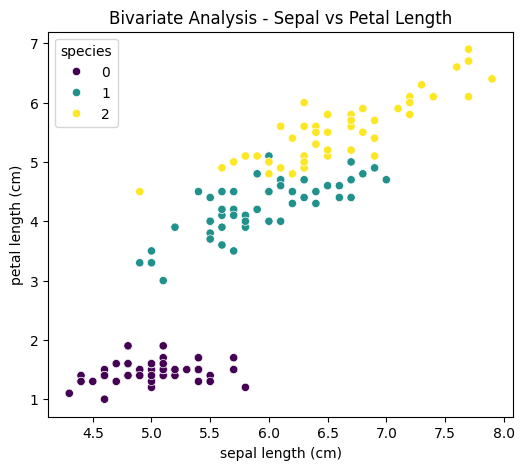

/tmp/ipython-input-79157800.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='species', y='petal width (cm)', palette='pastel')


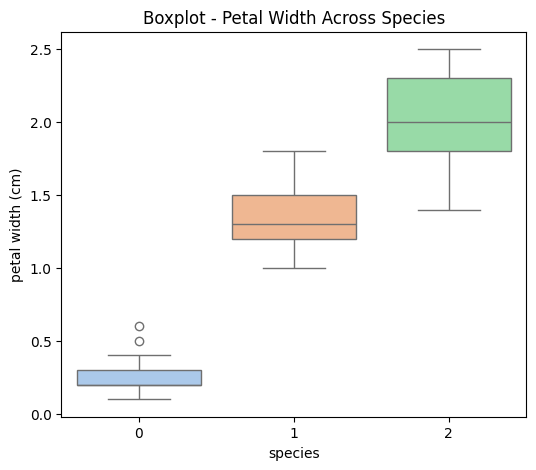

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.scatterplot(data=df, x='sepal length (cm)', y='petal length (cm)', hue='species', palette='viridis')
plt.title("Bivariate Analysis - Sepal vs Petal Length")
plt.show()

plt.figure(figsize=(6,5))
sns.boxplot(data=df, x='species', y='petal width (cm)', palette='pastel')
plt.title("Boxplot - Petal Width Across Species")
plt.show()


Sepal length and petal length show a strong positive correlation, clearly separating the three Iris species.
The boxplot reveals a clear ordinal progression in petal width across species, with increasing medians and interquartile ranges ( IQR ) from species 0 to 2, indicating strong inter-species variability and the potential of petal width as a key feature for classification.

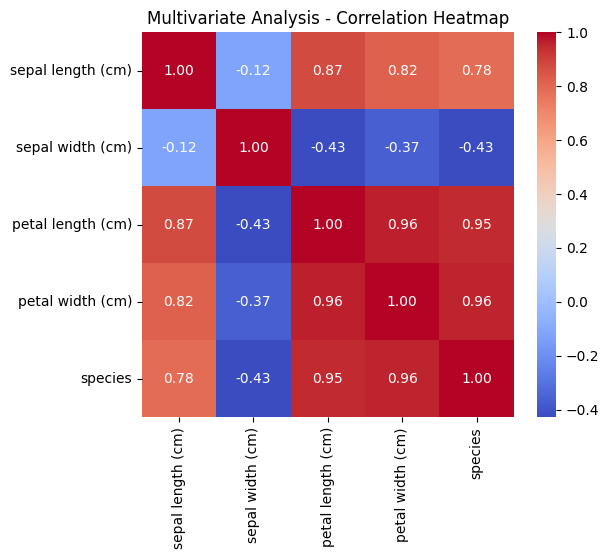

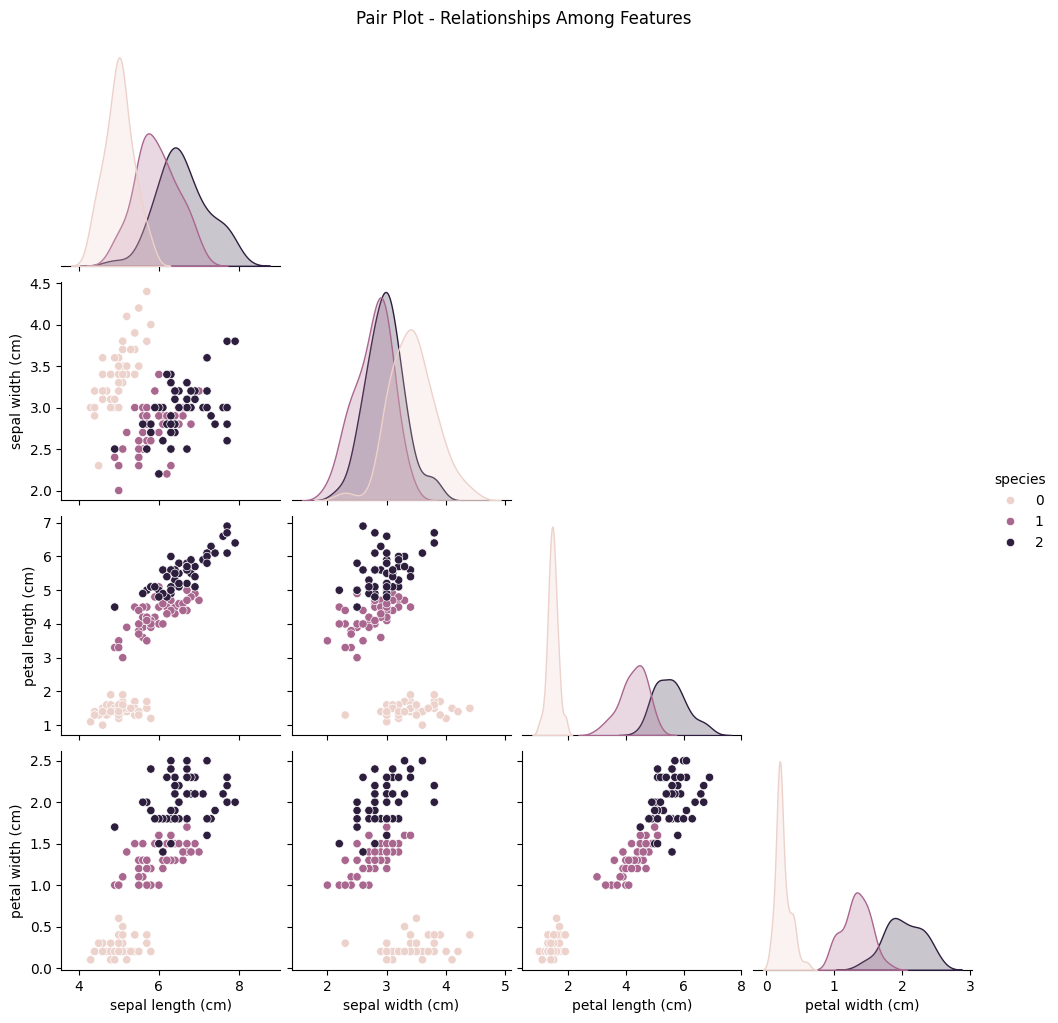

In [12]:
plt.figure(figsize=(6,5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Multivariate Analysis - Correlation Heatmap")
plt.show()

sns.pairplot(df, hue='species', corner=True)
plt.suptitle("Pair Plot - Relationships Among Features", y=1.02)
plt.show()



**Multivariate analysis** explores relationships among more than two variables simultaneously.
In this context, we examine how all four numerical features — *sepal length*, *sepal width*, *petal length*, and *petal width* — interact to distinguish between species.

The goal is to understand **combined feature patterns**, not just pairwise relationships.

 1. **Pairplot:** Provides a grid of scatter plots for every feature combination, colored by species. It helps visually confirm that *petal length* and *petal width* jointly offer the strongest class separation.
 2. **Heatmap (Correlation Matrix):** Displays the linear relationship between all feature pairs. High positive correlation between *petal length* and *petal width* suggests redundancy, while weaker correlation between *sepal width* and other features shows it provides unique information.

 Multivariate visualization helps verify that the dataset is inherently separable without complex transformations or dimensionality reduction.



In [13]:
features = ['sepal length (cm)', 'sepal width (cm)',
            'petal length (cm)', 'petal width (cm)']

scaler = StandardScaler()

scaled_data = scaler.fit_transform(df[features])

df_scaled = pd.DataFrame(scaled_data, columns=features)

print(df_scaled.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0          -0.900681          1.019004          -1.340227         -1.315444
1          -1.143017         -0.131979          -1.340227         -1.315444
2          -1.385353          0.328414          -1.397064         -1.315444
3          -1.506521          0.098217          -1.283389         -1.315444
4          -1.021849          1.249201          -1.340227         -1.315444


*Standardization ensures that all features contribute equally to any model or visualization that depends on numeric scales.*
Even though the Iris features share similar units (centimeters), their ranges differ slightly.

1. Using StandardScaler converts each feature to have mean 0 and standard deviation 1.

2. This step prevents features with higher magnitude from dominating those with smaller ranges.

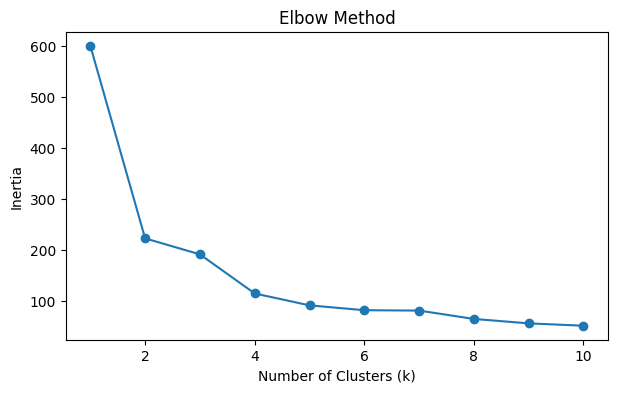

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(df_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(7,4))
plt.plot(K_range, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()


Implements the elbow method to choose an appropriate number of clusters for K-Means. It first defines a range of cluster counts from 1 to 10 and initializes an empty list to store inertia, which is the sum of squared distances of samples to their nearest cluster center. For each value of k, it fits a K-Means model on the scaled dataset df_scaled and appends the model’s inertia to the list. Finally, it plots k (x-axis) versus inertia (y-axis), producing the elbow curve; the “elbow” point, where the inertia stops decreasing sharply, indicates a good trade-off between model complexity and cluster compactness.

In [15]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(df_scaled)

df['kmeans_cluster'] = kmeans_labels
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name,species,kmeans_cluster
0,5.1,3.5,1.4,0.2,setosa,0,1
1,4.9,3.0,1.4,0.2,setosa,0,2
2,4.7,3.2,1.3,0.2,setosa,0,2
3,4.6,3.1,1.5,0.2,setosa,0,2
4,5.0,3.6,1.4,0.2,setosa,0,1


Fits a K-Means model with 3 clusters on the scaled feature matrix df_scaled, using a fixed random seed (42) to keep the clustering results reproducible. It then obtains the cluster assignments for each row via fit_predict, stores these labels in kmeans_labels, and adds them as a new column kmeans_cluster in the original DataFrame df. Finally, df.head() displays the first few rows so you can quickly inspect how each observation has been assigned to one of the three clusters.

In [16]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=3)
agg_labels = agg.fit_predict(df_scaled)

df['agg_cluster'] = agg_labels
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species_name,species,kmeans_cluster,agg_cluster
0,5.1,3.5,1.4,0.2,setosa,0,1,1
1,4.9,3.0,1.4,0.2,setosa,0,2,1
2,4.7,3.2,1.3,0.2,setosa,0,2,1
3,4.6,3.1,1.5,0.2,setosa,0,2,1
4,5.0,3.6,1.4,0.2,setosa,0,1,1


Applies Agglomerative Clustering, a hierarchical clustering technique, to the scaled dataset df_scaled with the number of clusters set to 3. The fit_predict method computes cluster assignments for each data point, which are then stored in agg_labels. These labels are added as a new column agg_cluster in the original DataFrame df. The command df.head() displays the first few rows to verify how the hierarchical clustering algorithm has grouped the data points into three clusters.

In [17]:
from sklearn.metrics import silhouette_score

sil_kmeans = silhouette_score(df_scaled, kmeans_labels)
sil_agg = silhouette_score(df_scaled, agg_labels)

print("Silhouette Score (K-Means):", round(sil_kmeans, 4))
print("Silhouette Score (Agglomerative):", round(sil_agg, 4))


Silhouette Score (K-Means): 0.4799
Silhouette Score (Agglomerative): 0.4467


Imports the silhouette score metric from scikit-learn to evaluate clustering quality, calculating it for both K-Means (sil_kmeans) and Agglomerative clustering (sil_agg) using the scaled features df_scaled and their respective labels. The silhouette score ranges from -1 to 1, where higher values indicate better-defined clusters with strong intra-cluster cohesion and inter-cluster separation. It then prints the rounded scores (to 4 decimal places) for easy comparison, helping determine which algorithm performs better on the dataset.

In [18]:
from sklearn.metrics import adjusted_rand_score, confusion_matrix

true_labels = df['species']

ari_kmeans = adjusted_rand_score(true_labels, df['kmeans_cluster'])
ari_agg = adjusted_rand_score(true_labels, df['agg_cluster'])

print("Adjusted Rand Index (K-Means):", round(ari_kmeans, 4))
print("Adjusted Rand Index (Agglomerative):", round(ari_agg, 4))

print("\nConfusion Matrix (K-Means):")
print(confusion_matrix(true_labels, df['kmeans_cluster']))

print("\nConfusion Matrix (Agglomerative):")
print(confusion_matrix(true_labels, df['agg_cluster']))


Adjusted Rand Index (K-Means): 0.4328
Adjusted Rand Index (Agglomerative): 0.6153

Confusion Matrix (K-Means):
[[ 0 33 17]
 [46  0  4]
 [50  0  0]]

Confusion Matrix (Agglomerative):
[[ 0 49  1]
 [23  0 27]
 [48  0  2]]


Imports Adjusted Rand Index (ARI) and confusion matrix from scikit-learn to evaluate clustering against ground truth species labels in df['species']. It computes ARI scores for both K-Means and Agglomerative clustering—ranging from -1 to 1, where 1 indicates perfect agreement and values near 0 suggest random labeling adjusted for chance—then prints them rounded to 4 decimals. Finally, it outputs confusion matrices showing true vs. predicted cluster assignments for each algorithm, revealing alignment between predicted clusters and actual species.

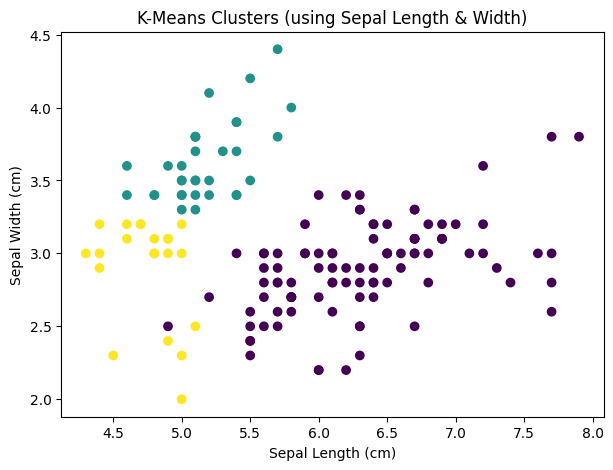

In [19]:
plt.figure(figsize=(7,5))
plt.scatter(df['sepal length (cm)'], df['sepal width (cm)'], c=df['kmeans_cluster'])
plt.title("K-Means Clusters (using Sepal Length & Width)")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Sepal Width (cm)")
plt.show()


Creates a scatter plot visualizing K-Means clustering results using sepal length (x-axis) and sepal width (y-axis) from the Iris dataset, with points colored by their kmeans_cluster assignments for clear cluster separation. The 7x5 inch figure size ensures readability, while the title specifies the features and algorithm used. It displays the plot to assess how well the two sepal measurements distinguish the three predicted clusters.

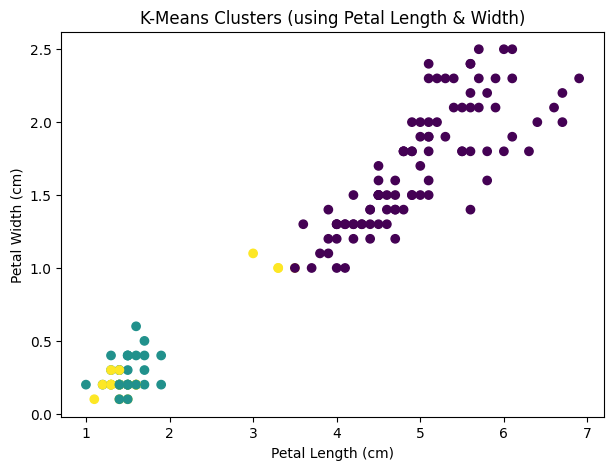

In [20]:
plt.figure(figsize=(7,5))
plt.scatter(df['petal length (cm)'], df['petal width (cm)'], c=df['kmeans_cluster'])
plt.title("K-Means Clusters (using Petal Length & Width)")
plt.xlabel("Petal Length (cm)")
plt.ylabel("Petal Width (cm)")
plt.show()


Generates a scatter plot visualizing K-Means clustering results using petal length (x-axis) and petal width (y-axis) from the Iris dataset, with points colored according to kmeans_cluster assignments to highlight cluster separation. The 7x5 figure size balances detail and readability, while the title and labeled axes clearly specify the petal features analyzed. Petal measurements typically show stronger species separation than sepal features, making this plot particularly effective for evaluating cluster quality.

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df_scaled
y = df['species']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print("KNN Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nConfusion Matrix (KNN):\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report (KNN):\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.9667

Confusion Matrix (KNN):
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]

Classification Report (KNN):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Sets up a supervised K-Nearest Neighbors (KNN) classification pipeline using the scaled features X = df_scaled and true species labels y = df['species']. It splits the data into 80/20 train/test sets with stratification to maintain class balance and a fixed random state for reproducibility, then trains a KNN classifier with 7 neighbors on the training data. Finally, it predicts on the test set and prints accuracy (rounded to 4 decimals), confusion matrix showing prediction errors by class, and a detailed classification report with precision, recall, and F1-scores for each species.

In [23]:
df.to_csv('iris_data_cleaned.csv', index=False)
print("\n Data extracted and saved successfully as 'iris_data_cleaned.csv'")


 Data extracted and saved successfully as 'iris_data_cleaned.csv'


Exports the processed DataFrame df (containing Iris features, species labels, and clustering results) to a CSV file named 'iris_data_cleaned.csv' without the row index using to_csv(index=False). The confirmation print statement verifies successful data persistence, enabling easy sharing, further analysis, or model deployment with the complete enriched dataset.